<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/cours2023/randomwalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax
import jax.numpy as jnp
from jax import random
from jax import grad, jit, vmap, value_and_grad
from jax.example_libraries import optimizers

from jax.config import config
config.update("jax_enable_x64", True)

# Numpy 
import numpy as np

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
mpl.rcParams['font.size'] = 18


from functools import partial


# 1D & 1 random walk chain 

In [4]:
def f(carry,x):
  yold, keyold = carry
  _, key = jax.random.split(keyold)
  y = yold + 2.*jax.random.bernoulli(key)-1.
  return (y,key),y


_, res = jax.lax.scan(f,(0., jax.random.PRNGKey(1)),jnp.arange(100))

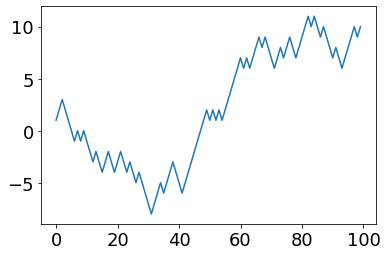

In [5]:
plt.plot(res)

# 1D & multi-chains 

In [26]:
#@partial(jit, static_argnums=(2,))
def update(rng_key, position, rho):
  key, subkey = jax.random.split(rng_key)
  move_proposals = 2.*jax.random.bernoulli(key)-1. 
  proposal = rho*position + move_proposals
  return proposal


#@partial(jit, static_argnums=(1,2))
def sampler(rng_key, n_samples, rho, initial_position):

  def _update(i, state):
        key, positions, rho = state
        _, key = jax.random.split(key)
        new_position = update(key, positions[i-1], rho)
        positions=positions.at[i].set(new_position)
        return (key, positions, rho)

  # all positions structure should be set before lax.fori_loop    
  all_positions = jnp.zeros((n_samples,initial_position.shape[0]))  # 1 chain for each vmap call
    
  initial_state = (rng_key,all_positions, rho)
  _, all_positions, _ = jax.lax.fori_loop(1, n_samples, 
                                                 _update, 
                                                 initial_state)
  return all_positions 


run_mc= vmap(sampler, in_axes=(0, None, None, 1), out_axes=0)

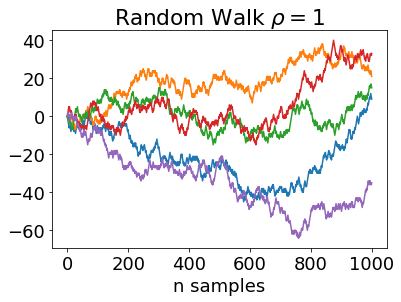

In [29]:
n_chains = 5       # nomber of chains
n_dim = 1          # dimensionality
n_samples = 1000   # number of samples per chain


rho = 1
rng_key = jax.random.PRNGKey(42)
rng_keys = jax.random.split(rng_key, n_chains)
initial_position = jnp.zeros((n_dim, n_chains))
all_positions = run_mc(rng_keys, n_samples,  rho, initial_position)
all_positions = all_positions.squeeze()

plt.plot(all_positions.T);
plt.xlabel("n samples");
plt.title(fr"Random Walk $\rho={rho}$");



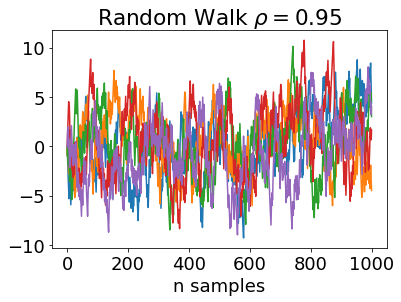

In [38]:
rho = 0.95
rng_key = jax.random.PRNGKey(42)
rng_keys = jax.random.split(rng_key, n_chains)
initial_position = jnp.zeros((n_dim, n_chains))
all_positions = run_mc(rng_keys, n_samples,  rho, initial_position)
all_positions = all_positions.squeeze()

plt.plot(all_positions.T);
plt.xlabel("n samples");
plt.title(fr"Random Walk $\rho={rho}$");


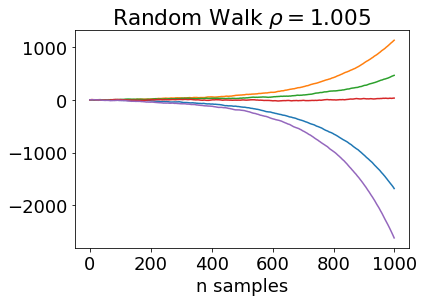

In [36]:
rho = 1.005
rng_key = jax.random.PRNGKey(42)
rng_keys = jax.random.split(rng_key, n_chains)
initial_position = jnp.zeros((n_dim, n_chains))
all_positions = run_mc(rng_keys, n_samples,  rho, initial_position)
all_positions = all_positions.squeeze()

plt.plot(all_positions.T);
plt.xlabel("n samples");
plt.title(fr"Random Walk $\rho={rho}$");